# Rabi Driving

This notebook contains a pedagogical explanation of Rabi driving, the
transformation into the rotating frame and the rotating wave approximation.

In 1937, Isidor Isaac Rabi published his studies of a two-level quantum
mechanical system of resonance frequency $\omega_0$ which is subjected to
a harmonic electric field of frequency $\omega \approx \omega_0$. Such a system
can be described in semi-classical fashion by the hamiltonian

\begin{equation}
H = H_{\mathrm{drift}} + H_{\mathrm{drive}},
\end{equation}

where

\begin{equation}
H_{\mathrm{drift}} = \frac{\omega_0}{2} \sigma_z
\end{equation}

and

\begin{equation}
H_{\mathrm{drive}} = A \cdot \mathrm{sin}(\omega t + \delta) \sigma_x
\end{equation}

with the amplitude of the driving field $A$, the time $t$, the phase offset
$\delta$ and all energies measured in units of the reduced planck constant
$\hbar = 1$.

Lets start with a simulation of this system. We use the convention to note all
frequencies as angular frequencies in units of $1/\mathrm{ms}$ and all times in
$\mathrm{ms}$.

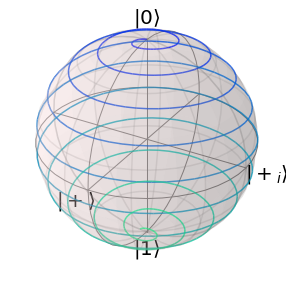

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qopt import *
import qopt.examples.rabi_driving.lab_frame_setup as rabi_setup

n_time_steps = 1000
delta_t = .01
total_time = n_time_steps * delta_t
resonance_frequency = 10 / total_time * 2 * np.pi
up = DenseOperator(np.asarray([[1], [0]]))

lab_solver = rabi_setup.build_lab_solver(
    resonance_frequency=resonance_frequency,
    n_time_steps=n_time_steps,
    delta_t=delta_t,
    exponential_method='spectral'
)

amplitude = 2 * np.pi * 2 * .5 / total_time
driving_frequency = resonance_frequency
phase_shift = 0.

# The amplitude function in the setup is constructed in a convenient way, which
# requires us only to set the parameters describing the pulse.

lab_solver.set_optimization_parameters(
    np.asarray([amplitude, driving_frequency, phase_shift]))

lab_solver.plot_bloch_sphere()
plt.show()

We plotted the pulse on the Bloch sphere for a visualization of the dynamics.
On the Bloch sphere, it can be seen how the system oscillates around the Z-Axis
which is the quantization axis in our system by choice of Hamiltonian. The
driving electric field steers the system from the North to the South Pole.

## Transformation into the Rotating Frame

Rabi found an analytical solution by transformation into the so called
rotating frame. This means that we consider a frame of resonance in which all
state vectors are rotating themselves with the resonance frequency of the
system. Given a state vector $\vert \psi(t) \rangle$ in the lab frame, we define
the transformed vector in the rotating frame

\begin{equation}
\vert \tilde{\psi} (t) \rangle = U^\dagger(t) \vert \psi (t) \rangle =
e^{i\omega t \sigma_z / 2} \vert \psi (t) \rangle.
\end{equation}

Please note that for a stationary vector
$\vert \psi (t) \rangle = \vert \psi  \rangle$ the rotating frame vector
$\vert \tilde{\psi} (t) \rangle$ is a solution to the undriven problem with
the Hamiltonian $H = H_{\mathrm{drift}}$ and initial state
$\vert \psi  \rangle$.

To transform the Hamiltonian into the rotating frame, we consider the time
evolution of a vector in the rotating frame.

\begin{align}
\partial_t \vert \tilde{\psi}(t) \rangle &=
(\partial_t U^\dagger(t)) \vert \psi (t) \rangle +
U^\dagger(t) \partial_t \vert \psi (t) \rangle \\
&= ((\partial_t U^\dagger(t)) U(t)
- i U^\dagger(t) H U(t)) \vert \tilde{\psi} (t)\rangle.
\end{align}

And we identify the rotating wave Hamiltonian as

\begin{align}
\tilde{H} &= i (\partial_t U^\dagger(t)) U(t) + U^\dagger(t) H U(t) \\
&= \frac{\omega_0 - \omega}{2} \sigma_z
+ e^{i\omega t \sigma_z / 2}
A \cdot \mathrm{sin}(\omega t + \delta) \sigma_x
e^{-i\omega t \sigma_z / 2} \\
&= \frac{\omega_0 - \omega}{2} \sigma_z +
A \cdot \mathrm{sin}(\omega t + \delta)
\begin{pmatrix}
e^{i\omega t / 2} & 0 \\
0 & e^{-i\omega t / 2}
\end{pmatrix}
\sigma_x
\begin{pmatrix}
e^{-i\omega t / 2} & 0 \\
0 & e^{i\omega t / 2}
\end{pmatrix} \\
\end{align}

\begin{align}
\tilde{H} &= \frac{\omega_0 - \omega}{2} \sigma_z +
A \cdot \mathrm{sin}(\omega t + \delta)
\begin{pmatrix}
0 & e^{i\omega t } \\
e^{-i\omega t } & 0
\end{pmatrix}
\end{align}

Now we can use Euler's identity to write

\begin{equation}
\mathrm{sin}(\omega t + \delta) = \frac{i}{2}(e^{- (i \omega t + i \delta)}
- e^{i \omega t + i \delta})
\end{equation}

so that

\begin{align}
\tilde{H} &= \frac{\omega_0 - \omega}{2} \sigma_z +
\frac{i}{2} A \cdot
\begin{pmatrix}
0 & e^{-i \delta} - e^{2i\omega t + i \delta} \\
e^{-2i\omega t - i \delta} - e^{ i \delta} & 0
\end{pmatrix}.
\end{align}

## Rotating Wave Approximation

This expression can be further simplified by neglecting the fast oscillatory
terms. This approximation is based on the intuition that fast oscillation will
average out on the timescale of driving. This requires that
$\omega_0 \approx \omega \gg A$ holds i.e. a separation of energy scales
between the driving strength and the resonance frequency. Then the Hamiltonian
becomes

\begin{align}
\tilde{H} &= \frac{\omega_0 - \omega}{2} \sigma_z +
\frac{i}{2} A \cdot
\begin{pmatrix}
0 & e^{- i \delta}  \\
- e^{ i \delta} & 0
\end{pmatrix}.
\end{align}

Using Eulers equation and writing the matrix in the pauli basis yields

\begin{align}
\tilde{H} &= \frac{\omega_0 - \omega}{2} \sigma_z +
\frac{1}{2} A \cdot(
\mathrm{sin}(\delta)\sigma_x - \mathrm{cos}(\delta)\sigma_y).
\end{align}

We can implement this rotating frame Hamiltonian separately to compare with
our results calculated in the lab frame.

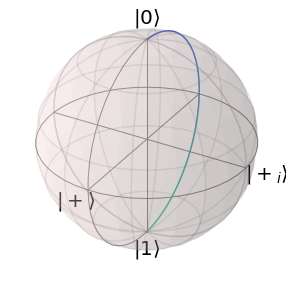

In [3]:
rot_frame_solver = rabi_setup.build_rotational_frame_solver(
frequency_detuning=0.,
n_time_steps=n_time_steps,
delta_t=delta_t,
exponential_method='spectral'
)

x_pi_pulse = np.zeros((n_time_steps, 2))
x_pi_pulse[:, 1] = -2 * np.pi * .5 / total_time
rot_frame_solver.set_optimization_parameters(x_pi_pulse)
rot_frame_solver.plot_bloch_sphere()
plt.show()

## Transformation of Operators

Lets now translate the results from the labframe to the rotating frame by
transformation.

### False Friend in Transformation

This subsection concerns a common error that may be skipped by readers
with a sound foundation in quantum mechanics.

We consider the action of a time dependent operator $Q(t)$ on a state vector
$\vert \psi \rangle$ and insert the unity operator to translate into the
rotational frame

\begin{align}
\langle \psi \vert Q \vert \psi \rangle
&= \langle \psi \vert U(t) U^\dagger(t) Q(t) U(t) U^\dagger(t) \vert \psi \rangle \\
&= \langle \tilde{\psi}(t) \vert  U^\dagger(t) Q(t) U(t)  \vert \tilde{\psi}(t) \rangle \\
\end{align}

such that we identify the operator in the rotating frame
$\tilde{Q}(t) = U^\dagger(t) Q(t) U(t)$.

So lets transform the propagators into the rotating frame:

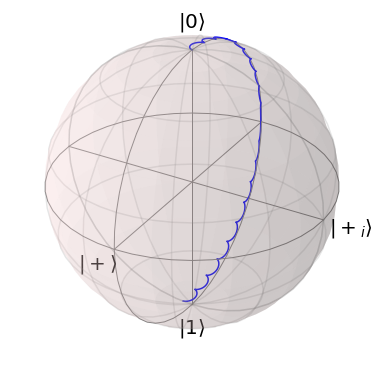

In [4]:
propagators = lab_solver.forward_propagators

def transform_prop_to_rot_frame_(
        propagator,
        time,
        resonance_frequency
):
    u= (-.5 * DenseOperator.pauli_z()).exp(1j * time * resonance_frequency)
    return u.dag() * propagator * u

transformed_propagators = [
    transform_prop_to_rot_frame_(p, t, resonance_frequency)
    for p, t in zip(propagators, delta_t* np.arange(n_time_steps+1))
]

plot_bloch_vector_evolution(transformed_propagators, up)
plt.show()

We can also express the transformed Propagators as $\mathrm{SO}(3)$ rotations.

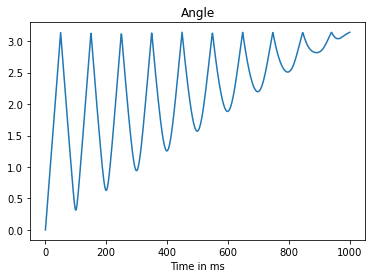

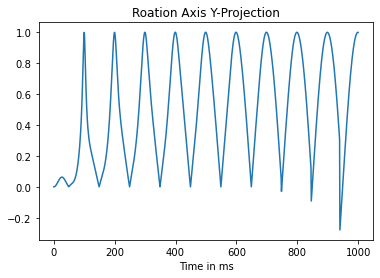

In [5]:
import matplotlib.pyplot as plt
angles = [angle_axis_representation(p)[0] for p in transformed_propagators]
axis_y_projection = [
    angle_axis_representation(p)[1][1] for p in transformed_propagators]

plt.plot(np.arange(len(angles)), angles)
plt.title('Angle')
plt.xlabel('Time in ms')
plt.figure()
plt.plot(axis_y_projection)
plt.title('Roation Axis Y-Projection')
plt.xlabel('Time in ms')
plt.show()

Here we see some unexpected rotations  by the resonance frequency. This
should not be the case because we transformed into a frame which does not see
these Oscillations.

The propagation of the state $\vert 0 \rangle$ looked normal but if we chose
the initial state
$\vert + \rangle = \frac{1}{2} (\vert 0 \rangle + \vert 1 \rangle)$

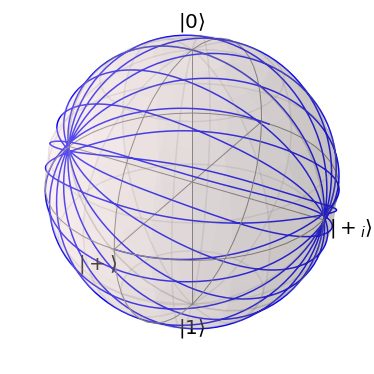

In [6]:
plus = (1 / np.sqrt(2)) * DenseOperator(np.asarray([[1], [1]]))
plot_bloch_vector_evolution(transformed_propagators, plus)
plt.show()

Then we come to the conclusion that there must be a mistake in the
transformation. And in fact, this transformation transforms the propagator
into a rotated frame at the final time of the propagation. To make the
description consistent again, we would also have to transform the vectors on
which the propagators act, into a rotated frame at the end time of the
propagation.

### Transforming Propagators

To find the direct transformation to the solution of the rotating frame
Hamiltonian, we need to reconsider what the transformation of a
propagator means. In this case the transformation itself is time dependent, and
a propagator connects two points in time by transforming a vector from one to
the other $\vert \psi (t_2) \rangle = P(t_1, t_2) \vert \psi (t_1) \rangle$.
Thus the transformation is given by

\begin{equation}
\tilde{P}(t_1, t_2) = U^\dagger(t_2) P(t_1, t_2) U(t_1).
\end{equation}

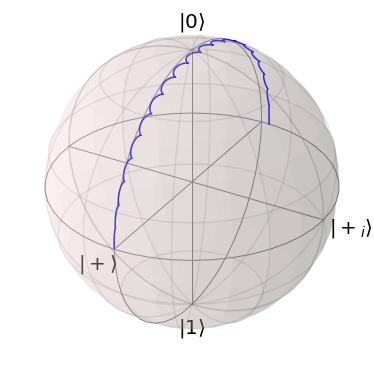

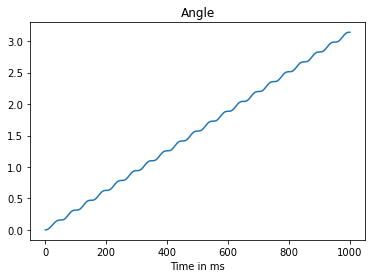

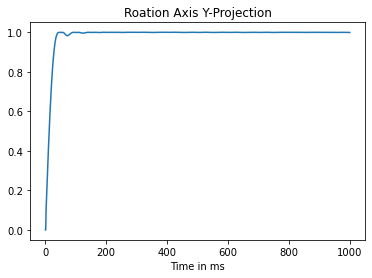

In [7]:
def transform_prop_to_rot_frame(
        propagator,
        time_end,
        time_start,
        resonance_frequency
):
    u_end = (-.5 * DenseOperator.pauli_z()).exp(1j * time_end * resonance_frequency)
    u_start = (-.5 * DenseOperator.pauli_z()).exp(1j * time_start * resonance_frequency)
    return u_end.dag() * propagator * u_start

transformed_propagators = [
    transform_prop_to_rot_frame(p, t, 0, resonance_frequency)
    for p, t in zip(propagators, delta_t* np.arange(n_time_steps+1))
]

plot_bloch_vector_evolution(transformed_propagators, plus)

plt.figure()
angles = [angle_axis_representation(p)[0] for p in transformed_propagators]
axis_y_projection = [
    angle_axis_representation(p)[1][1] for p in transformed_propagators]
plt.plot(angles)
plt.title('Angle')
plt.xlabel('Time in ms')
plt.figure()
plt.plot(axis_y_projection)
plt.title('Roation Axis Y-Projection')
plt.xlabel('Time in ms')
plt.show()

## Discrete Rabi Driving

Now we get almost the behavior, which we expected. The next thing we note is
a slight offset of the rotation angle.

The final state of the evolution is not exactly at
$\vert - \rangle = \frac{1}{2}$$(\vert 0 \rangle - \vert 1 \rangle)$, where we
expect it to be. Due to the smallness of the error our first idea is that the
required inequality $\omega_0 \gg A$ does not hold. Hence we increase the
resonance frequency by a factor of two:

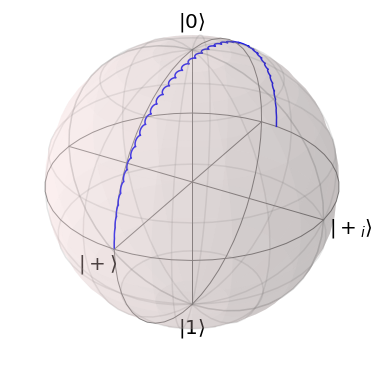

In [8]:
resonance_frequency = 20 / total_time * 2 * np.pi

lab_solver_2 = rabi_setup.build_lab_solver(
    resonance_frequency=resonance_frequency,
    n_time_steps=n_time_steps,
    delta_t=delta_t,
    exponential_method='spectral'
)

driving_frequency = resonance_frequency
lab_solver_2.set_optimization_parameters(
    np.asarray([amplitude, driving_frequency, phase_shift]))

propagators = lab_solver_2.forward_propagators
transformed_propagators = [
    transform_prop_to_rot_frame(p, t, 0, resonance_frequency)
    for p, t in zip(propagators, delta_t* np.arange(n_time_steps+1))
]

plot_bloch_vector_evolution(transformed_propagators, plus)
plt.show()

But the Problem just got worse. Maybe a
numerical problem? Next, we increase the number of time steps by a factor
of 2:

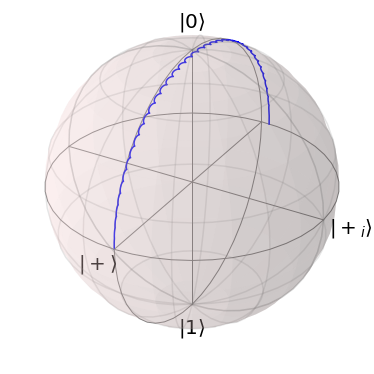

In [9]:
n_time_steps = 2000
delta_t = .005
total_time = n_time_steps * delta_t
resonance_frequency = 20 / total_time * 2 * np.pi

lab_solver_3 = rabi_setup.build_lab_solver(
    resonance_frequency=resonance_frequency,
    n_time_steps=n_time_steps,
    delta_t=delta_t,
    exponential_method='spectral'
)

driving_frequency = resonance_frequency
lab_solver_3.set_optimization_parameters(
    np.asarray([amplitude, driving_frequency, phase_shift]))

propagators = lab_solver_3.forward_propagators
transformed_propagators = [
    transform_prop_to_rot_frame(p, t, 0, resonance_frequency)
    for p, t in zip(propagators, delta_t* np.arange(n_time_steps+1))
]

plot_bloch_vector_evolution(transformed_propagators, plus)
plt.show()

This reduced the offset to the prior value and gives us the hint that it scales
with the product $\omega t$. This is why we conclude that it is not a problem
of numerical accuracy but rather inherent to the discretization, so that we
conclude that the problem is a systematical over rotation.

If we write down the elements of the propagator in discrete time

\begin{align}
&\langle \tilde{\psi} (n_2 \cdot \Delta t) \vert
\tilde{P}(n_1 \cdot \Delta t, n_2 \cdot \Delta t)
\vert \tilde{\psi} (n_1 \cdot \Delta t) = \\
&\langle \tilde{\psi} (n_2 \cdot \Delta t) \vert
U^\dagger(n_2 \cdot \Delta t)P(n_1 \cdot \Delta t, n_2 \cdot \Delta t)
U(n_1 \cdot \Delta t)
\vert \tilde{\psi} (n_1 \cdot \Delta t).
\end{align}

And consider only the first time step ($n_1 = 1, n_2=1$):

\begin{align}
\langle \tilde{\psi} (\Delta t) \vert
U^\dagger(\Delta t)P(0, \Delta t)
U(0)
\vert \tilde{\psi} (0)
\end{align}

Then we become aware that the Propagator $P(0, \Delta t)$ is a matrix
exponential solving Schrodinger's equation with the discretized value of the
driving field at time $t=0$, which is the central value of the interval
$[-.5 \Delta t, 5 \Delta t]$. Therefore we either have to shift our sampling
of the driving field by $.5 \Delta t$ or the transformation of the
rotating frame to become consistent again.

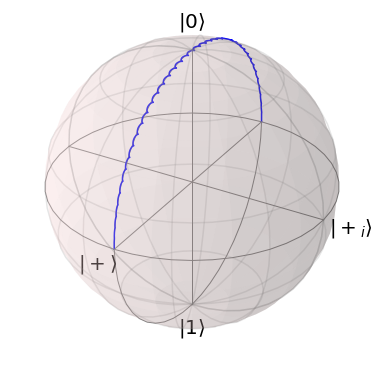

In [10]:
transformed_propagators = [
    transform_prop_to_rot_frame(p, t, -.5 * delta_t, resonance_frequency)
    for p, t in zip(propagators, delta_t* (np.arange(n_time_steps+1) - .5))
]

plot_bloch_vector_evolution(transformed_propagators, plus)
plt.show()